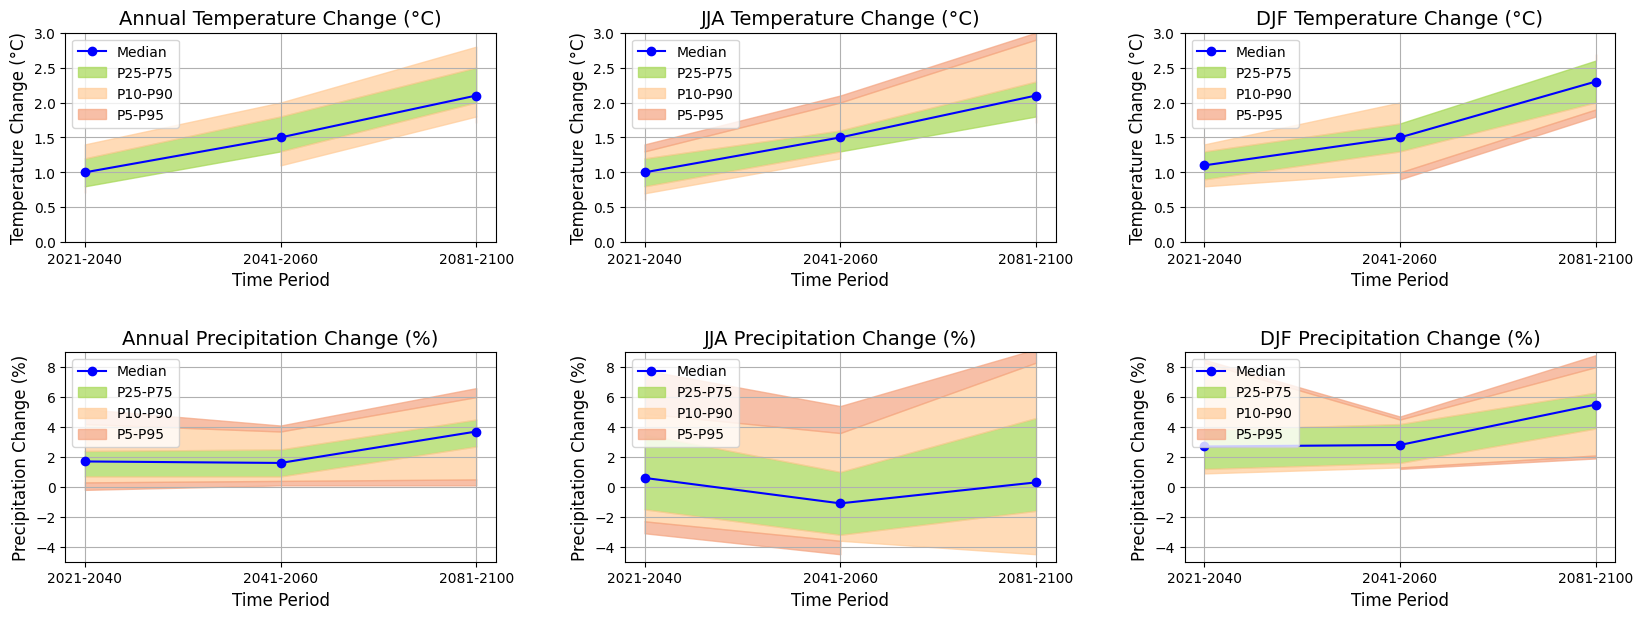

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Function to plot the data with non-overlapping uncertainty bands
def plot_with_uncertainty(ax, file_path, title, ylabel, y_limits):
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Remove any rows with NaN values in the 'Period' column to avoid issues
    data = data.dropna(subset=['Period'])

    # Extract the required data
    periods = data['Period']
    median = pd.to_numeric(data['Median'], errors='coerce')
    p25 = pd.to_numeric(data['P25'], errors='coerce')
    p75 = pd.to_numeric(data['P75'], errors='coerce')
    p10 = pd.to_numeric(data['P10'], errors='coerce')
    p90 = pd.to_numeric(data['P90'], errors='coerce')
    p5 = pd.to_numeric(data['P5'], errors='coerce')
    p95 = pd.to_numeric(data['P95'], errors='coerce')

    # Plot the median line
    ax.plot(periods, median, label='Median', color='blue', marker='o')

    # Plot non-overlapping bands by calculating differences
    # Plot P25-P75 (light green)
    ax.fill_between(periods, p25, p75, color='#a6d854', alpha=0.7, label='P25-P75')

    # Plot the area between P10-P90 and P25-P75 (light orange)
    ax.fill_between(periods, p10, p25, color='#ffcc99', alpha=0.7, label='P10-P90', where=(p10 < p25))
    ax.fill_between(periods, p75, p90, color='#ffcc99', alpha=0.7, where=(p75 < p90))

    # Check if P5-P95 is entirely covered by P10-P90
    if all((p5 >= p10) & (p95 <= p90)):
        # If covered, add annotation
        ax.text(0.5, 0.9, 'P5-P95 band not shown (covered by P10-P90)', 
                transform=ax.transAxes, fontsize=10, color='gray', ha='center')
    else:
        # Plot the area between P5-P95 and P10-P90 (light red/pink)
        ax.fill_between(periods, p5, p10, color='#f4a582', alpha=0.7, label='P5-P95', where=(p5 < p10))
        ax.fill_between(periods, p90, p95, color='#f4a582', alpha=0.7, where=(p90 < p95))

    # Set consistent y-axis limits
    ax.set_ylim(y_limits)

    # Add titles and labels with increased font sizes
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel('Time Period', fontsize=12)
    ax.grid(True)
    ax.legend(loc='upper left', fontsize=10)

    # Set tick label font size
    ax.tick_params(axis='x', rotation=0, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# File paths for the CSV files
data_files_temperature = ['Annual Temp.csv', 'JJA Temp.csv', 'DJF Temp.csv']
data_files_precipitation = ['Annual Precip.csv', 'JJA Precip.csv', 'DJF Precip.csv']

# Titles for temperature and precipitation plots
titles_temperature = ['Annual Temperature Change (°C)', 'JJA Temperature Change (°C)', 'DJF Temperature Change (°C)']
titles_precipitation = ['Annual Precipitation Change (%)', 'JJA Precipitation Change (%)', 'DJF Precipitation Change (%)']

# Define consistent y-axis limits for temperature and precipitation
y_limits_temperature = (0, 3)  # Example limits for temperature graphs, adjust based on your data
y_limits_precipitation = (-5, 9)  # Example limits for precipitation graphs, adjust based on your data

# Set up the figure and GridSpec layout with increased spacing between rows
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(4, 3, height_ratios=[0.05, 1, 1, 0.05], wspace=0.3, hspace=1.0)  # Increased hspace to 1.0

# Create axes for the 3 temperature and 3 precipitation plots
axes_temperature = [fig.add_subplot(gs[1, i]) for i in range(3)]
axes_precipitation = [fig.add_subplot(gs[2, i]) for i in range(3)]

# Plot temperature changes with consistent y-axis limits
for i, file_path in enumerate(data_files_temperature):
    plot_with_uncertainty(axes_temperature[i], file_path, titles_temperature[i], 'Temperature Change (°C)', y_limits_temperature)

# Plot precipitation changes with consistent y-axis limits
for i, file_path in enumerate(data_files_precipitation):
    plot_with_uncertainty(axes_precipitation[i], file_path, titles_precipitation[i], 'Precipitation Change (%)', y_limits_precipitation)

# Save the figure as a high-quality PNG image
plt.savefig('image.png', dpi=300, bbox_inches='tight')
plt.show()